<a href="https://colab.research.google.com/github/fibleep/sludge-water-plant/blob/main/water_plants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Waste Management in a Water Purification Plant
Client X has two input streams with used water that they clean using two large tanks. These tanks are filled
with living bacteria that eat the contaminants in the water, i.e. cleaning it. The bacteria will be less active
or even die if they get too much or too little food (contaminants), too much or too little oxygen, or if the
correct pH is not maintained. If this happens the sludge concentration at the exit of the tanks, i.e. our
target variable, will be to high and additional expensive cleaning steps need to be performed. It is your job
to forecast this sludge concentration 4h in advance.

## Our Variables

|Name    |Description                         |Units|
|--------|------------------------------------|-----|
|InputC1 |O2 percentage in tank 1             |%    |
|InputC2 |Liquid to reduce the pH in tank 1   |l/h  |
|InputC3 |Filtered sludge going back to tank 1|m3/h |
|InputC4 |Outside air                         |Nm3/h|
|InputC5 |Height in tank 1                    |m    |
|InputC6 |Flowrate to pH measurement in tank 1|l/h  |
|InputC7 |pH of liquid in tank 1              |pH   |
|InputC8 |Flowrate to O2 measurement in tank 1|l/h  |
|InputC9 |O2 dissolved in tank 1              |mg/l |
|InputC10|Temperature of liquid in tank 1     |°C   |
|        |                                    |     |
|InputE1 |Consentration of sludge             |g/l  |
|InputE2 |Conductivity                        |mS   |
|InputE3 |NO3 dissolved                       |mg/l |
|        |                                    |     |
|InputD1 |O2 percentage in tank 2             |%    |
|InputD2 |Liquid to reduce the pH in tank 2   |l/h  |
|InputD3 |Filtered sludge going back to tank 2|m3/h |
|InputD4 |Outside air                         |Nm3/h|
|InputD5 |Height in tank 2                    |m    |
|InputD6 |Flowrate to pH measurement in tank 1|l/h  |
|InputD7 |pH of liquid in tank 2              |pH   |
|InputD8 |Flowrate to O2 measurement in tank 2|l/h  |
|InputD9 |O2 dissolved in tank 2              |mg/l |
|InputD10|Temperature of liquid in tank 2     |°C   |
|        |                                    |     |
|InputA1 |Temperature                         |°C   |
|InputA2 |Flowrate                            |m3/h |
|InputA3 |Amount of sludge in water           |mg/l |
|InputA4 |Conductivity                        |mS/cm|
|InputA5 |                                    |kg/h |
|InputA6 |pH                                  |pH   |
|        |                                    |     |
|InputB1 |Temperature                         |°C   |
|InputB2 |Flowrate                            |m3/h |
|InputB3 |Amount of sludge in water           |mg/l |
|InputB4 |Conductivity                        |mS/cm|
|InputB5 |                                    |kg/h |
|InputB6 |pH                                  |pH   |
|        |                                    |     |
|Target  |Target variable                     |mg/L |


# EDA

## Loading in data and installing necessary packages

In [123]:
!git clone https://github.com/fibleep/sludge-water-plant.git
!pip install pandas numpy seaborn matplotlib xgboost

fatal: destination path 'sludge-water-plant' already exists and is not an empty directory.


In [124]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("/content/sludge-water-plant/dataset/dataset.csv",index_col=[0])
df.index = pd.to_datetime(df.index)
df.head()

,InputC1,InputC2,InputC3,InputC4,InputC5,InputC6,InputC7,InputC8,InputC9,InputC10,...,InputA4,InputA5,InputA6,InputB1,InputB2,InputB3,InputB4,InputB5,InputB6,Target
2022-01-01 00:00:00,18.49650,18.81396,100.0696,618.6791,NaN,1931.360,7.272931,1878.295,1.549485,27.25480,...,60.10090,7.385031,7.081979,27.39823,20.89696,260.1674,2.193955,NaN,6.236635,NaN
2022-01-01 00:05:00,18.49731,18.70401,100.0715,613.7349,NaN,1929.365,7.273591,1878.252,1.552745,27.25177,...,60.09105,7.375766,7.136544,27.07825,26.92165,259.9575,2.187813,NaN,6.238485,NaN
2022-01-01 00:10:00,18.49693,18.59405,100.0733,608.7906,NaN,1924.322,7.274251,1878.209,1.556006,27.24874,...,60.08120,7.366502,7.085941,26.75828,14.01370,259.7475,2.181671,NaN,6.240336,NaN
2022-01-01 00:15:00,18.49603,18.48410,100.0751,603.8464,NaN,1919.279,7.274910,1878.167,1.559266,27.24572,...,60.07135,7.357237,6.743883,26.50328,5.78938,259.5375,2.175529,NaN,6.242187,NaN
2022-01-01 00:20:00,18.49512,18.37415,100.0770,598.9022,NaN,1914.235,7.275570,1878.124,1.562526,27.24269,...,60.06150,7.347972,6.621848,26.29828,39.27962,259.3275,2.169388,NaN,6.244037,NaN


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76474 entries, 2022-01-01 00:00:00 to 2022-09-23 13:45:00
Data columns (total 36 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   InputC1   71948 non-null  float64
 1   InputC2   70943 non-null  float64
 2   InputC3   71116 non-null  float64
 3   InputC4   76396 non-null  float64
 4   InputC5   67461 non-null  float64
 5   InputC6   70914 non-null  float64
 6   InputC7   70852 non-null  float64
 7   InputC8   70828 non-null  float64
 8   InputC9   70880 non-null  float64
 9   InputC10  70802 non-null  float64
 10  InputE1   70871 non-null  float64
 11  InputE2   74587 non-null  float64
 12  InputE3   33120 non-null  float64
 13  InputD1   71923 non-null  float64
 14  InputD2   71190 non-null  float64
 15  InputD3   71138 non-null  float64
 16  InputD4   76398 non-null  float64
 17  InputD5   66353 non-null  float64
 18  InputD6   70881 non-null  float64
 19  InputD7   71128 non-null  float6

Looks like the data is collected every 5 minutes, NaN values are present, the target column can be NaN as well

In [126]:
missing_values = df.isnull().sum() / len(df)
missing_values.sort_values(ascending=False).head(5)

InputE3    0.566912
InputB5    0.435547
InputA2    0.332427
InputD5    0.132346
InputA4    0.125847
dtype: float64

The ratio of nulls, it looks like E3, B5, A2 are null the most often

E3 -> NO3 dissolved

B5 -> Not Specified

A2 -> Flow rate


What can we deduce from this?

Some bacteria need nitrogen, I assume that's why NO3 is sometimes null and sometimes not.

B5 is not specified


In [127]:
df['Target'].describe()

count    70286.000000
mean        51.028149
std         44.037615
min         -0.011699
25%         21.311235
50%         33.956840
75%         62.185650
max        203.460900
Name: Target, dtype: float64

This is sludge, in mg/L. The negative value is probably a mistake of the readings.

It looks like there's quite a bit of variation, there are some really high outliers but generally it should be around 30-40 mg/L

In [128]:
corr = df.corr()
corr = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr = corr.unstack().transpose().sort_values(ascending=False).dropna()
corr[:20]

InputD10  InputC10    0.997912
InputD4   InputC4     0.985786
InputD1   InputC1     0.973743
InputA5   InputA3     0.860394
          InputC4     0.802451
InputB5   InputB3     0.800484
InputA5   InputD4     0.793131
InputD7   InputC7     0.772154
Target    InputD5     0.762300
InputD5   InputC5     0.742540
InputA3   InputC4     0.711730
InputD9   InputC9     0.700897
InputA3   InputD4     0.693287
InputC4   InputC2     0.572892
InputD4   InputC2     0.571811
InputA5   InputE1     0.569396
InputA3   InputE1     0.561188
Target    InputC5     0.559241
InputD4   InputE1     0.549919
InputE1   InputC4     0.536829
dtype: float64

The most correlated and interesting features are:

- D10 - C10 - Temperatures in both tanks
- D4 - C4 - Outside air
- D1 - C1 - 02 Percentage in Tanks
- A5 - A3 - ???? / Amount of sludge in water
   - This seems like a very important correlation, shame there's no description for A5, need to keep this in mind
- A5 - D4 - ???? / Outside air
  - Another correlation with the missing feature
- Target/D5 Height of the 2nd tank
  - The 2nd tank is more correlated with the target than the first tank
- A3 / C4 & D4 - Amount of sludge / Air outside

array([[<Axes: title={'center': 'InputC1'}>,
        <Axes: title={'center': 'InputC2'}>,
        <Axes: title={'center': 'InputC3'}>,
        <Axes: title={'center': 'InputC4'}>,
        <Axes: title={'center': 'InputC5'}>,
        <Axes: title={'center': 'InputC6'}>],
       [<Axes: title={'center': 'InputC7'}>,
        <Axes: title={'center': 'InputC8'}>,
        <Axes: title={'center': 'InputC9'}>,
        <Axes: title={'center': 'InputC10'}>,
        <Axes: title={'center': 'InputE1'}>,
        <Axes: title={'center': 'InputE2'}>],
       [<Axes: title={'center': 'InputE3'}>,
        <Axes: title={'center': 'InputD1'}>,
        <Axes: title={'center': 'InputD2'}>,
        <Axes: title={'center': 'InputD3'}>,
        <Axes: title={'center': 'InputD4'}>,
        <Axes: title={'center': 'InputD5'}>],
       [<Axes: title={'center': 'InputD6'}>,
        <Axes: title={'center': 'InputD7'}>,
        <Axes: title={'center': 'InputD8'}>,
        <Axes: title={'center': 'InputD9'}>,
      

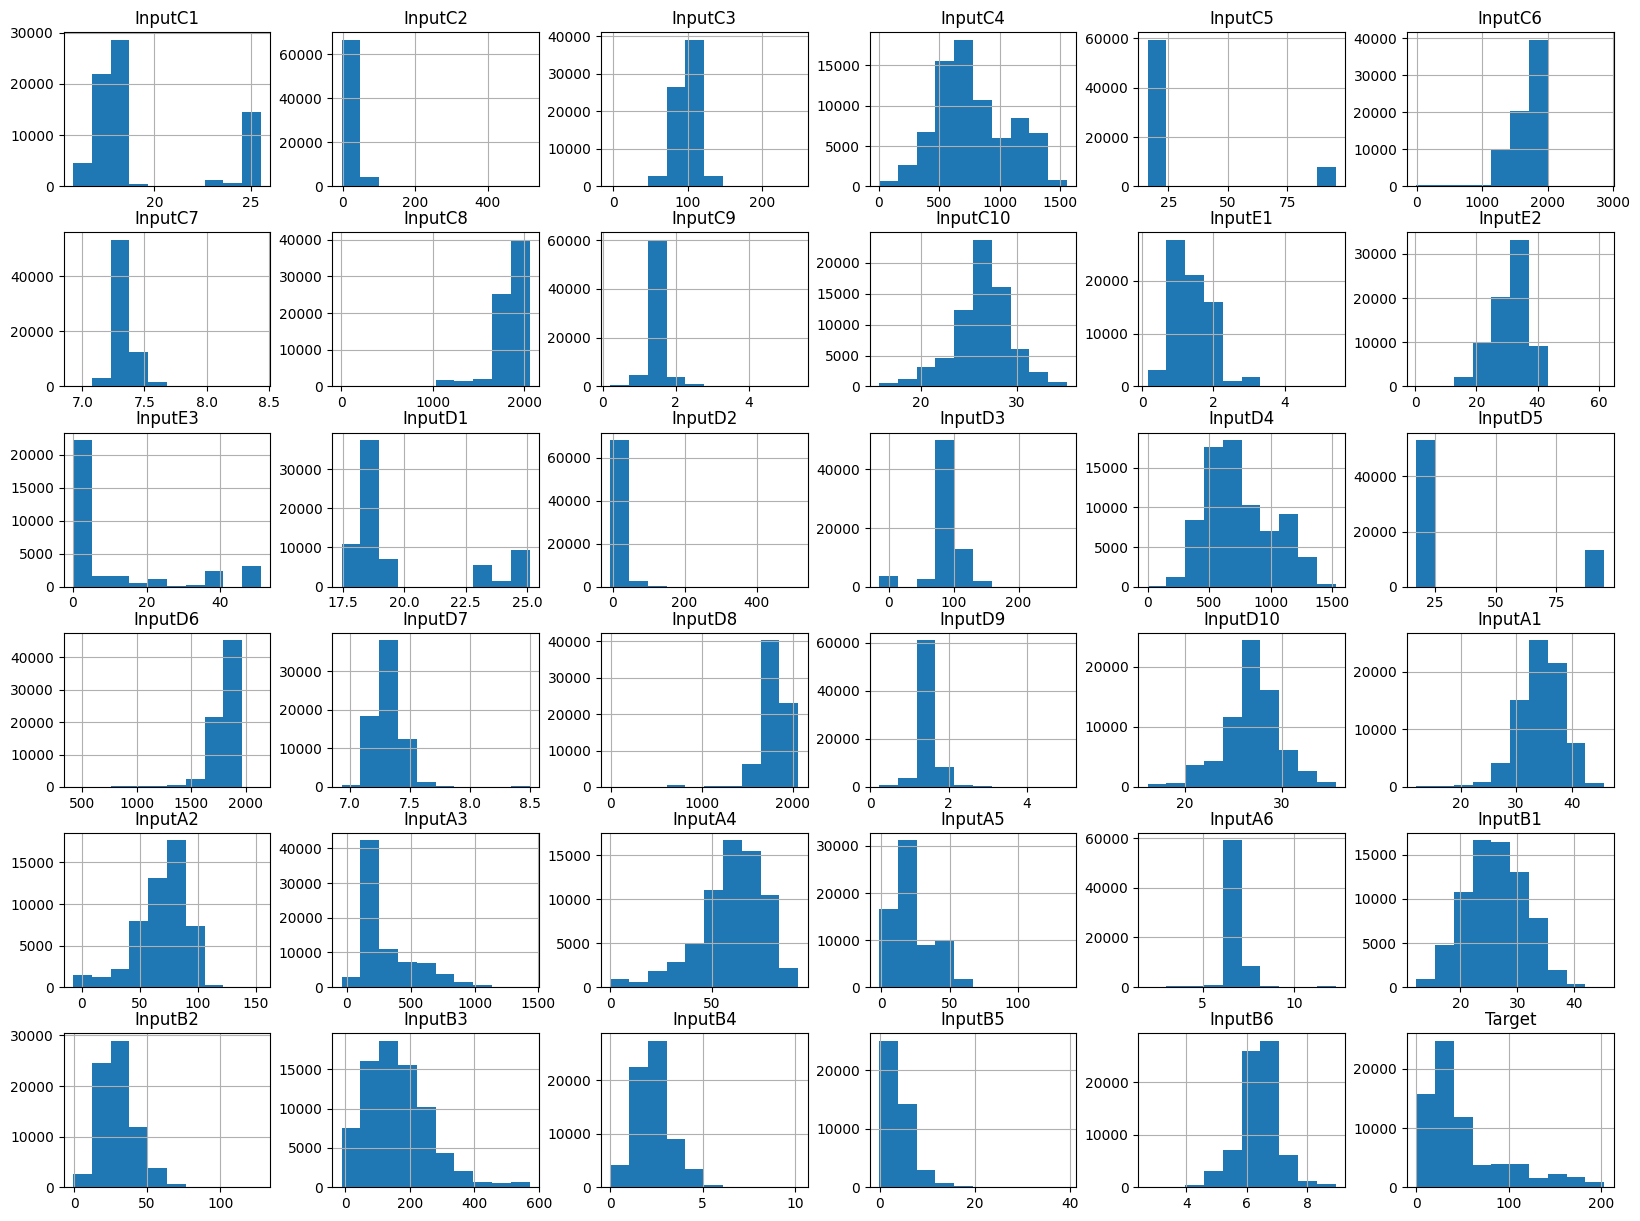

In [129]:
df.hist(figsize=(20,15))

## Data Augmentation

The value that's null the most often is E3 - NO3 dissolved, let's assume that is because it is 0 or close to 0. Looking at the histogram, E3 is mostly 0.

In [130]:
import pandas as pd
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df)
X = imputer.transform(df)

df = pd.DataFrame(X, columns=df.columns, index=df.index)

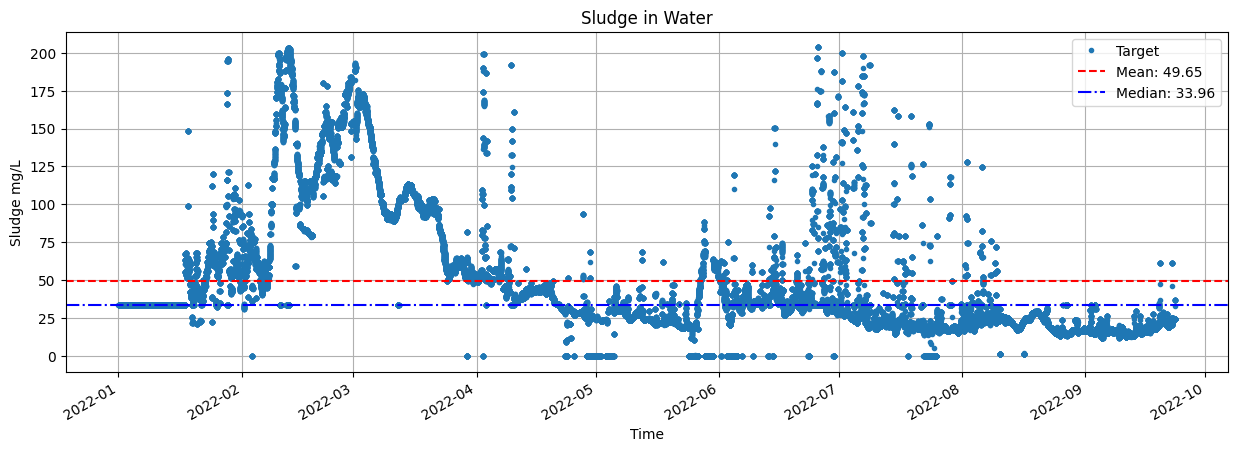

In [131]:
def plot_target(df):
  df['Target'].plot(
      style='.',
      figsize=(15, 5),
      title='Sludge in Water',
      grid=True,
      xlabel="Time",
      ylabel="Sludge mg/L"
      )

  mean_value = df['Target'].mean()
  median_value = df['Target'].median()

  plt.axhline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
  plt.axhline(median_value, color='blue', linestyle='-.', label=f'Median: {median_value:.2f}')

  plt.legend()
  plt.show()

plot_target(df)

It looks like the data was pretty unstable throughout the year with huge spikes in February, March, April and July.

### Create Features

In [132]:
# def create_features(df):
#     """
#     Create time series features based on time series index.
#     """
#     df = df.copy()
#     df['hour'] = df.index.hour
#     df['dayofweek'] = df.index.dayofweek
#     df['quarter'] = df.index.quarter
#     df['month'] = df.index.month
#     df['year'] = df.index.year
#     df['dayofyear'] = df.index.dayofyear
#     df['dayofmonth'] = df.index.day
#     df['weekofyear'] = df.index.isocalendar().week
#     return df
# df = create_features(df)

### Investigating the seasonal anomalies

Null Ratio: 0.0


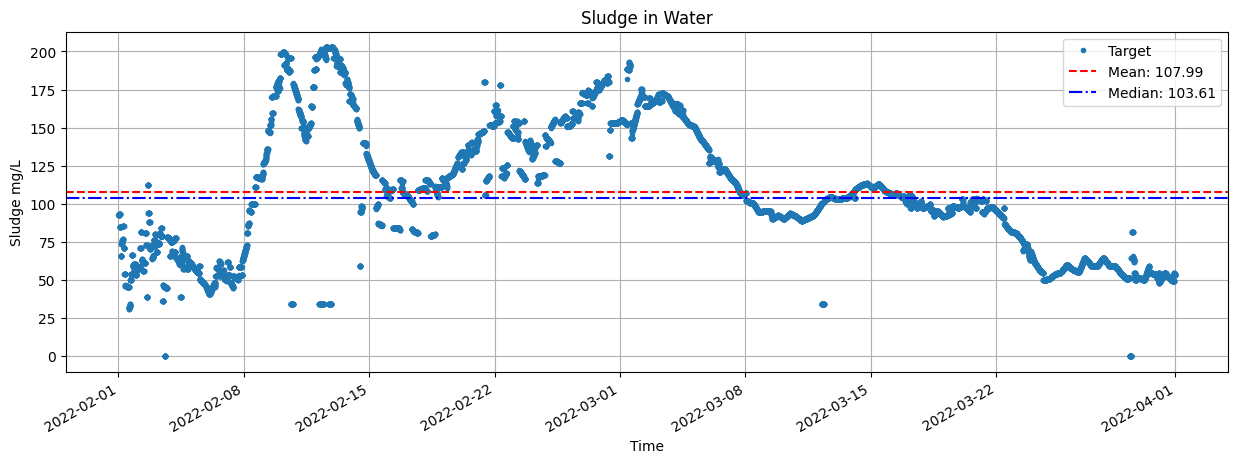

In [133]:
spring_anomalies = df.loc[(df.index > "02-01-2022") & (df.index < "04-01-2022")]
print(f"Null Ratio: {spring_anomalies['Target'].isnull().sum() / len(spring_anomalies)}")
plot_target(spring_anomalies)

Null Ratio: 0.0


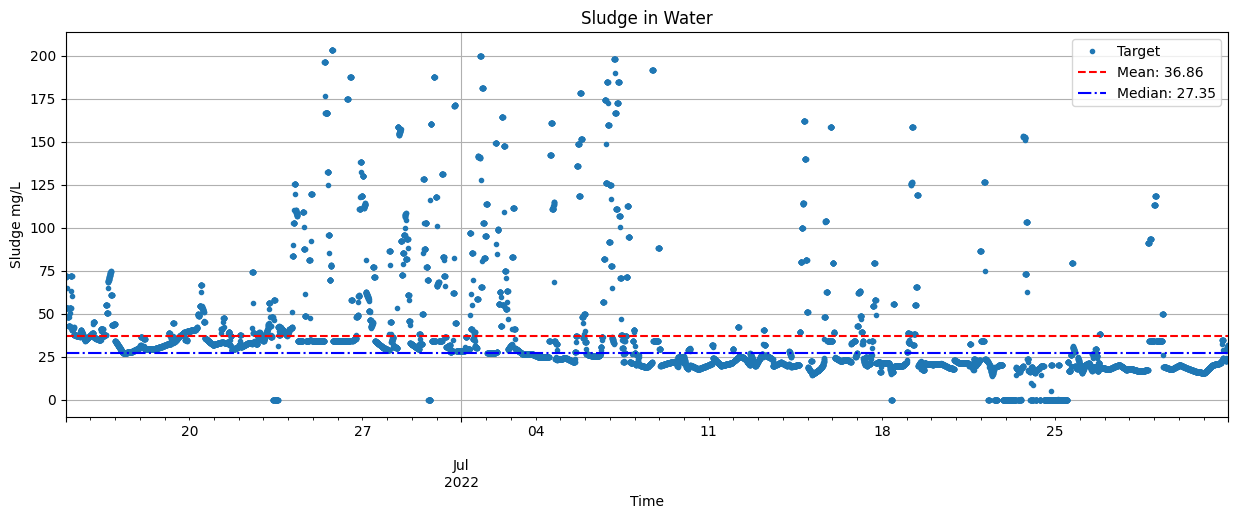

In [134]:
summer_anomalies = df.loc[(df.index > "06-15-2022") & (df.index < "08-01-2022")]
print(f"Null Ratio: {summer_anomalies['Target'].isnull().sum() / len(summer_anomalies)}")
plot_target(summer_anomalies)

For the summer anomalies, I would like to see only the outlier points

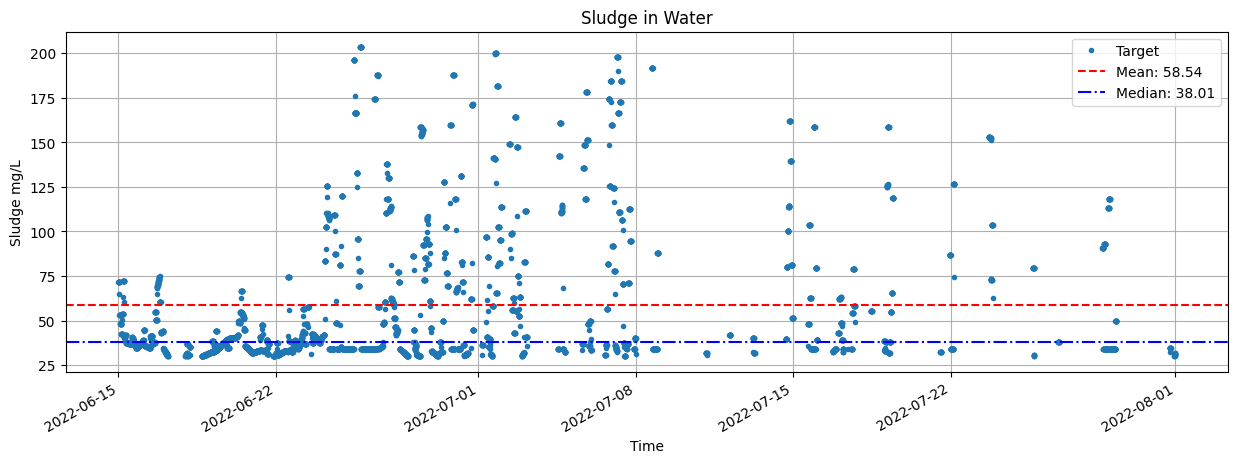

In [135]:
summer_anomalies = summer_anomalies[summer_anomalies['Target']> 30]
plot_target(summer_anomalies)

# Train our model(s)

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Target', axis=1), df['Target'], test_size=0.2, random_state=42)

In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model, X_test, y_test, is_3d=False):
    """
    Evaluate the model
    """

    if is_3d:
        X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print metrics
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R2 Score:", r2)

## XGBoost

In [138]:
import xgboost as xgb

reg = xgb.XGBRegressor(
    base_score=0.5,
    booster="gbtree",
    n_estimators=1000,
    objective="reg:linear",
    max_depth=3,
    learning_rate=0.05
)

reg.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    early_stopping_rounds=50,
    verbose=100
)


[0]	validation_0-rmse:62.12695	validation_1-rmse:61.97941


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:06:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:17.39026	validation_1-rmse:17.98887
[200]	validation_0-rmse:15.57942	validation_1-rmse:16.18009
[300]	validation_0-rmse:14.45284	validation_1-rmse:15.08428
[400]	validation_0-rmse:13.63389	validation_1-rmse:14.27330
[500]	validation_0-rmse:12.89101	validation_1-rmse:13.53976
[600]	validation_0-rmse:12.33909	validation_1-rmse:13.03230
[700]	validation_0-rmse:11.81600	validation_1-rmse:12.52677
[800]	validation_0-rmse:11.39953	validation_1-rmse:12.17419
[900]	validation_0-rmse:10.99906	validation_1-rmse:11.81280
[999]	validation_0-rmse:10.64049	validation_1-rmse:11.48414


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

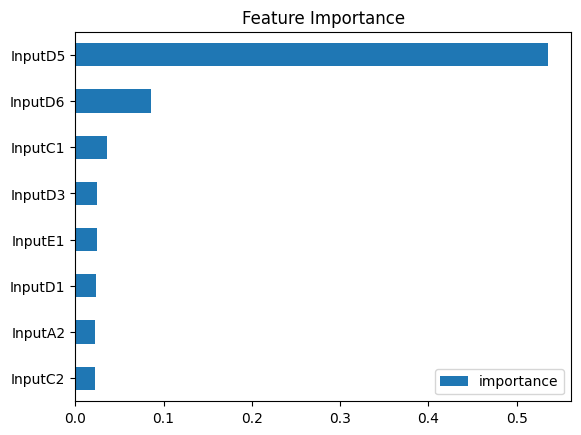

In [139]:
fi = pd.DataFrame(
    data=reg.feature_importances_, index=reg.feature_names_in_, columns=["importance"]
)
fi.sort_values("importance")[-8:].plot(kind="barh", title="Feature Importance")
plt.show()

D5 is the most important feature according to our regressor. D5 is the height of the container

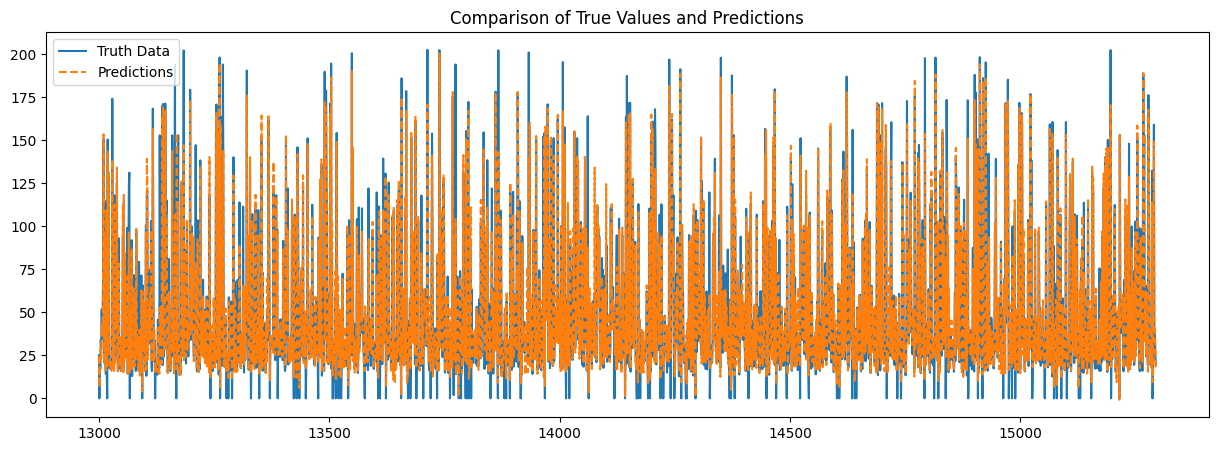

In [140]:
y_pred = reg.predict(X_test)
predict_df = pd.DataFrame({'True Values': y_test, 'Predictions': y_pred})
plot_df = predict_df.reset_index(drop=True)[13000:]

plt.figure(figsize=(15, 5))
plt.plot(plot_df['True Values'], label='Truth Data')
plt.plot(plot_df['Predictions'], label='Predictions',linestyle='--')
plt.legend()
plt.title('Comparison of True Values and Predictions')
plt.show()

In [144]:
evaluate_model(reg, X_test, y_test)

Mean Absolute Error (MAE): 6.317084527247017
Mean Squared Error (MSE): 131.88558191819644
Root Mean Squared Error (RMSE): 11.484144805696088
R² Score: 0.9264127387246839


XGB looks very promising, let's try some other ones

## LSTM

An LSTM is good for time series data, the forget mechanism makes sure that only the relevant data is used.

In [145]:
!pip install keras

In [162]:
# Reshape the data to be LSTM compliant, LSTMs need 3D input
transformed_X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
transformed_X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

n_timesteps, n_features, n_outputs = transformed_X_train.shape[1], transformed_X_train.shape[2], 1

def build_lstm(X_train, y_train, X_test, y_test, epochs=25, batch_size=32):
    """
    Build an LSTM model
    """

    X_train = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
    X_test = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
    # Store the best model
    callbacks = [tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]

    # Build the network
    model = Sequential()
    model.add(LSTM(200, activation='relu', input_shape=(n_timesteps, n_features)))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(n_outputs))
    print('compiling baseline model...')
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mape'])
    print('fitting model...')
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1, callbacks=callbacks)
    return model, history

model, history = build_lstm(X_train, y_train, X_test, y_test)


compiling baseline model...
fitting model...
Epoch 1/25
1912/1912 [==============================] - 11s 5ms/step - loss: 621.8138 - mae: 16.8640 - mape: 59099164.0000 - val_loss: 502.5638 - val_mae: 14.5145 - val_mape: 55894620.0000
Epoch 2/25
1912/1912 [==============================] - 10s 5ms/step - loss: 476.3524 - mae: 13.8816 - mape: 57870300.0000 - val_loss: 452.6717 - val_mae: 13.2737 - val_mape: 56934308.0000
Epoch 3/25
1912/1912 [==============================] - 10s 5ms/step - loss: 438.6396 - mae: 13.0378 - mape: 55033876.0000 - val_loss: 471.6712 - val_mae: 12.8834 - val_mape: 30993924.0000
Epoch 4/25
1912/1912 [==============================] - 10s 5ms/step - loss: 414.3690 - mae: 12.5604 - mape: 49275524.0000 - val_loss: 433.0589 - val_mae: 13.5708 - val_mape: 61681660.0000
Epoch 5/25
1912/1912 [==============================] - 10s 5ms/step - loss: 394.2624 - mae: 12.1281 - mape: 44440644.0000 - val_loss: 416.7822 - val_mae: 12.4473 - val_mape: 43372448.0000
Epoch 6/25

In [154]:
evaluate_model(model, X_test, y_test, is_3d=True)

478/478 [==============================] - 1s 2ms/step
Mean Absolute Error (MAE): 10.927438157314121
Mean Squared Error (MSE): 346.5278829569363
Root Mean Squared Error (RMSE): 18.615259411486488
R² Score: 0.806650298755546


## Transformer
Transformers work with attention, they can compute in parallel and are very good for large datasets

In [168]:
from keras import layers


def transformer_encoder(inputs, head_size, num_heads, ff_dim,
                        dropout=0, attention_axes=None):
  """
  Creates a single transformer block.
  """
  x = layers.LayerNormalization(epsilon=1e-6)(inputs)
  x = layers.MultiHeadAttention(
      key_dim=head_size, num_heads=num_heads, dropout=dropout,
      attention_axes=attention_axes
      )(x, x)
  x = layers.Dropout(dropout)(x)
  res = x + inputs

    # Feed Forward Part
  x = layers.LayerNormalization(epsilon=1e-6)(res)
  x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
  x = layers.Dropout(dropout)(x)
  x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
  return x + res

def build_transfromer(head_size,
                      num_heads,
                      ff_dim,
                      num_trans_blocks,
                      mlp_units, dropout=0, mlp_dropout=0, attention_axes=None) -> tf.keras.Model:
  """
  Creates final model by building many transformer blocks.
  """
  inputs = tf.keras.Input(shape=(n_timesteps, n_features))
  x = inputs
  for _ in range(num_trans_blocks):
    x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

  x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
  for dim in mlp_units:
    x = layers.Dense(dim, activation="relu")(x)
    x = layers.Dropout(mlp_dropout)(x)

  outputs = layers.Dense(n_outputs, activation='relu')(x)
  return tf.keras.Model(inputs, outputs)

transformer = build_transfromer(head_size=128, num_heads=4, ff_dim=2,
                                num_trans_blocks=4, mlp_units=[256],
                                mlp_dropout=0.10, dropout=0.10,
                                attention_axes=1)

transformer.compile(
    loss="mse",
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    metrics=["mae", 'mape'],
)

callbacks = [tf.keras.callbacks.EarlyStopping(patience=10,
                                              restore_best_weights=True)]

t_hist = transformer.fit(transformed_X_train, y_train, batch_size=32,
                         epochs=25, validation_data=(transformed_X_test, y_test),
                         verbose=1, callbacks=callbacks)

Epoch 1/25
1912/1912 [==============================] - 47s 17ms/step - loss: 1095.0909 - mae: 23.9343 - mape: 58239864.0000 - val_loss: 664.7793 - val_mae: 18.1328 - val_mape: 50872468.0000
Epoch 2/25
1912/1912 [==============================] - 32s 17ms/step - loss: 658.0124 - mae: 18.0643 - mape: 55864488.0000 - val_loss: 647.5566 - val_mae: 17.3792 - val_mape: 51071144.0000
Epoch 3/25
1912/1912 [==============================] - 31s 16ms/step - loss: 633.7698 - mae: 17.6286 - mape: 54381104.0000 - val_loss: 617.1402 - val_mae: 17.0788 - val_mape: 50171816.0000
Epoch 4/25
1912/1912 [==============================] - 32s 17ms/step - loss: 619.7770 - mae: 17.3697 - mape: 54122044.0000 - val_loss: 612.8656 - val_mae: 17.2897 - val_mape: 51378644.0000
Epoch 5/25
1912/1912 [==============================] - 31s 16ms/step - loss: 611.1545 - mae: 17.1904 - mape: 54910212.0000 - val_loss: 621.1146 - val_mae: 16.5899 - val_mape: 49177100.0000
Epoch 6/25
1912/1912 [===========================

In [170]:
evaluate_model(transformer,X_test,y_test,True)

478/478 [==============================] - 2s 4ms/step
Mean Absolute Error (MAE): 14.347634194522112
Mean Squared Error (MSE): 502.8190405597087
Root Mean Squared Error (RMSE): 22.423626837773337
R2 Score: 0.7194456317839093


It looks like the XGBoost remains victorious

In [171]:
evaluate_model(reg,X_test,y_test)

Mean Absolute Error (MAE): 6.317084527247017
Mean Squared Error (MSE): 131.88558191819644
Root Mean Squared Error (RMSE): 11.484144805696088
R2 Score: 0.9264127387246839
